In [1]:
%matplotlib inline
from ion_sim import IonPlot
from scipy.constants import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from ipywidgets import interact

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = (8.0,6.0)
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 18
rc('animation', html='html5')

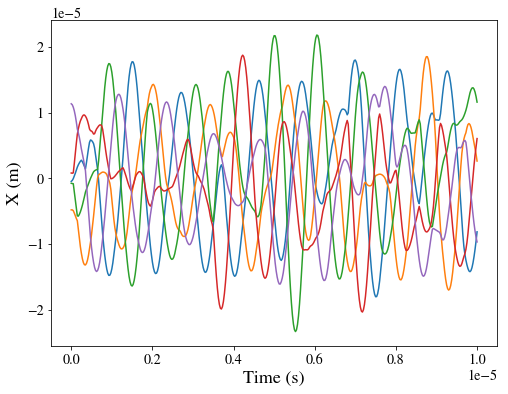

In [2]:
s1 = IonPlot()
s1.m = 25 * atomic_mass
s1.U = lambda x, y, z: (1/2)*(s1.m) * (2*pi*1e6)**2*(x**2 + 5**2*y**2 + 5**2*z**2)
s1.gamma = (hbar / 4) * (2 * pi / (280e-9))**2 * np.array([1, 1, 1]) / np.sqrt(3)
s1.init_thermal(n=5, T=5e-3, sigma_x=5e-6, sigma_y=5e-6, sigma_z=5e-6)
t = np.linspace(0, 10e-6, 401)
s1.run(t)
s1.plot()
plt.ylabel('X (m)');

In [3]:
s1.animate()

rerunning


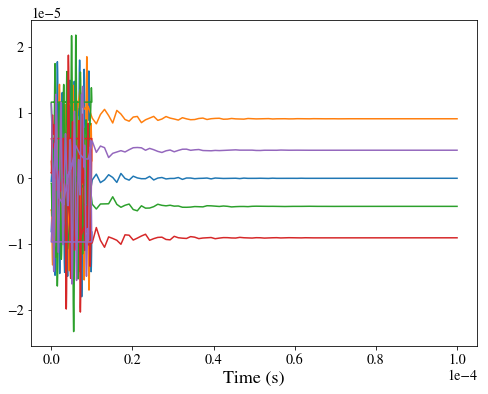

In [4]:
# Rerun for long time to find equilibrium positions
s1.run(np.linspace(0, 100e-6, 100))
s1.plot()

In [5]:
pnm = lambda normal_mode: s1.plot_normal_modes(i=normal_mode)
interact(pnm, normal_mode=(0,s1.x.shape[-1]*3-1))

<function __main__.<lambda>>

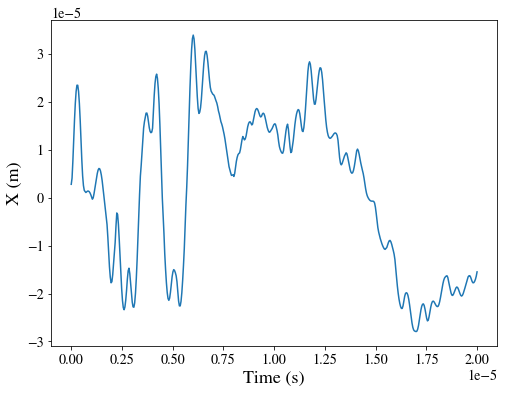

In [6]:
s2 = IonPlot()
s2.m = 25 * atomic_mass
s2.U = lambda x, y, z: (1/2)*(s2.m) * (2*pi*1e6)**2*(x**2 + y**2 + 5**2*z**2)
s2.gamma = (hbar / 4) * (2 * pi / (280e-9))**2 * np.array([1, 1, 1]) / np.sqrt(3)
s2.init_thermal(n=100, T=5e-3, sigma_x=5e-6, sigma_y=5e-6, sigma_z=5e-6)
t = np.linspace(0, 20e-6, 500)
s2.run(t)
s2.plot(1)
plt.ylabel('X (m)');

In [8]:
s2.animate()

In [ ]:
# Rerun for long time to find equilibrium positions
s2.run(np.linspace(0, 100e-6, 500))
s2.plot(1)